# 数据科学基础 第三次作业

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
% matplotlib inline

In [2]:
# 读取数据集
boston = datasets.load_boston()
data = boston.data
target = boston.target
print target.shape
print data.shape

(506L,)
(506L, 13L)


[  3.08895182e+04   6.25027401e+03   8.18365244e+02   2.66683023e+02
   5.01347040e+01   2.78967669e+01   1.61009055e+01   9.53431045e+00
   3.27329483e+00   1.18108745e+00   2.55106135e-01   6.01011611e-02
   3.05352042e-03]
[  9.04292880e+02  -1.65196554e+03   9.15906793e+02  -1.22555731e+00
   1.55723607e+01  -3.54896931e+01   3.33830319e+03  -2.36354794e+02
   1.32023584e+03   2.74293146e+04   1.56705189e+02  -1.49524290e+04
   8.21185284e+02]


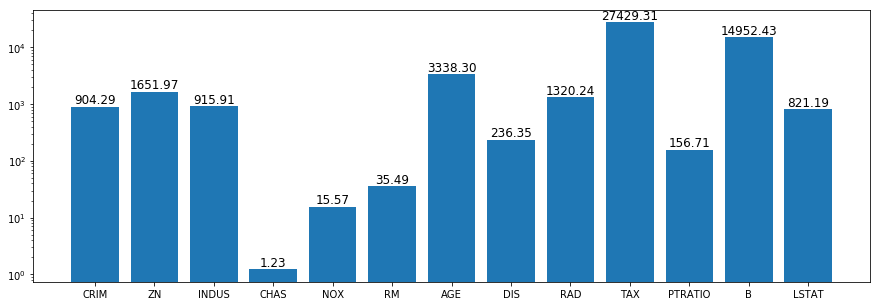

In [3]:
col_mean = np.mean(data,axis=0)
centered_data = data - col_mean
cov_data = np.cov(centered_data.T)
w,v = np.linalg.eig(cov_data)
print(w)
weights = np.sum(w[:5]*v[:,:5],axis=-1)
print(weights)
weights = np.abs(weights)
plt.figure(figsize=(15,5))
plt.bar(range(1,14),weights,log=True)
for x,y in zip(range(1,14),weights):
    plt.text(x, y, '%.2f' % (y), ha='center', va= 'bottom',fontsize=12)
labels=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(range(1,14),labels,rotation=0)
plt.savefig('figure/weights.pdf')
plt.show()

80.5814643498
96.8865497481
99.021418583
99.7171143966
99.8479007636
99.9206750397
99.9626774604
99.9875496093
99.9960886512
99.9991697532
99.9998352484
99.9999920343
100.0


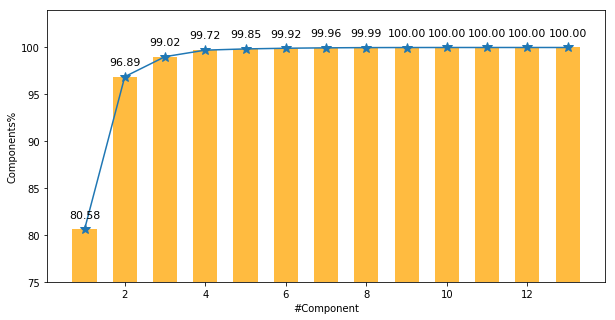

In [4]:
# 主成分比重
col_mean = np.mean(data,axis=0)
centered_data = data - col_mean
cov_data = np.cov(centered_data.T)
w,v = np.linalg.eig(cov_data)

sum_components = []
for i in range(13):
    sum_components.append(100*(np.sum(w[:i+1])/np.sum(w)))
plt.figure(figsize=(10, 5))
plt.plot(range(1,14),sum_components,marker='*',markersize=10)
plt.bar(range(1,14),sum_components,color='orange',width=0.6,alpha=0.75)
for x,y in zip(range(1,14),sum_components):
    print(y)
    plt.text(x, y+1, '%.2f' % (y), ha='center', va= 'bottom',fontsize=11)
plt.ylim((75,104))
plt.xlabel('#Component')
plt.ylabel('Components%')
plt.savefig('figure/component_percentage.pdf')
plt.show()

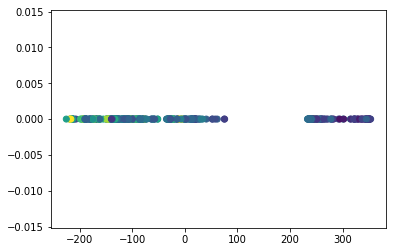

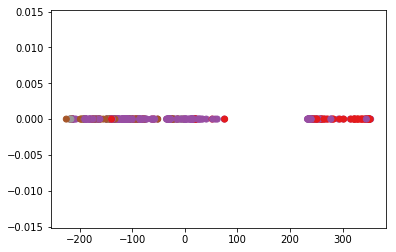

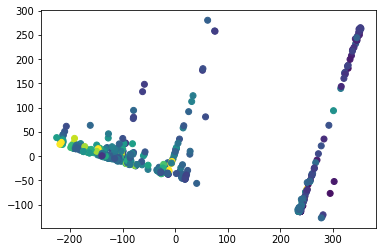

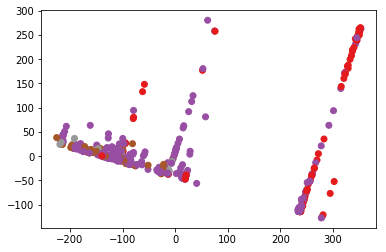

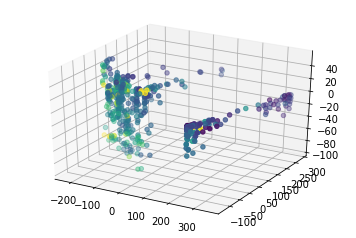

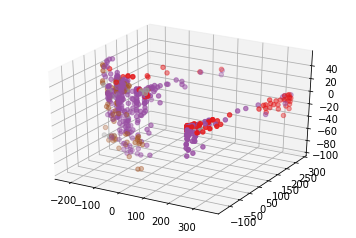

array([0, 1, 2, 3])

In [5]:
# 降维结果可视化
col_mean = np.mean(data,axis=0)
centered_data = data - col_mean
cov_data = np.cov(centered_data.T)
new_target = (np.floor(target/15)).astype(np.int32)
# w: 特征值, v: 特征向量
w,v = np.linalg.eig(cov_data)
# print(w)
# print(v)
data_pca1c = np.dot(centered_data, v[:,:1])
data_pca2c = np.dot(centered_data, v[:,:2])
data_pca3c = np.dot(centered_data, v[:,:3])

plt.scatter(data_pca1c[:,0],np.zeros(data_pca1c.shape[0]),c=target)
plt.savefig('figure/pca_1d_raw.pdf')
plt.show()
plt.scatter(data_pca1c[:,0],np.zeros(data_pca1c.shape[0]),c=new_target,cmap='Set1')
plt.savefig('figure/pca_1d.pdf')
plt.show()

plt.scatter(data_pca2c[:,0],data_pca2c[:,1],c=target)
plt.savefig('figure/pca_2d_raw.pdf')
plt.show()
plt.scatter(data_pca2c[:,0],data_pca2c[:,1],c=new_target,cmap='Set1')
plt.savefig('figure/pca_2d.pdf')
plt.show()

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(data_pca3c[:,0],data_pca3c[:,1],data_pca3c[:,2],c=target)
plt.savefig('figure/pca_3d_raw.pdf')
plt.show()
fig2 = plt.figure()
bx = fig2.add_subplot(111, projection='3d')
bx.scatter(data_pca3c[:,0],data_pca3c[:,1],data_pca3c[:,2],c=new_target,cmap='Set1')
plt.savefig('figure/pca_3d.pdf')
plt.show()

np.unique(new_target)

In [6]:
# 训练集/验证集划分
idxs = np.arange(target.shape[0])
np.random.shuffle(idxs)

In [7]:
scores = []
for n_dim in range(1,14):
    col_mean = np.mean(data[idxs[:300]],axis=0)
    centered_data = data - col_mean
    cov_data = np.cov(centered_data[idxs[:300]].T)
    # w: 特征值, v: 特征向量
    w,v = np.linalg.eig(cov_data)
    # print(w)
    # print(v)
    data_pca2c = np.dot(centered_data, v[:,:n_dim])
    X_train = data_pca2c[idxs[:300]]
    Y_train = target[idxs[:300]]
    X_test = data_pca2c[idxs[300:]]
    Y_test = target[idxs[300:]]

    regressor = LinearRegression()
    regressor.fit(X_train,Y_train)
    
    scores.append(mean_squared_error(Y_test, regressor.predict(X_test)))

    print scores[-1]

69.3913612405
68.9799924913
66.9134335222
66.3248258363
61.5968208547
39.1256639017
37.7404978856
37.0952712548
31.5798053973
29.8757394317
27.7580928387
30.159798352
29.074433968


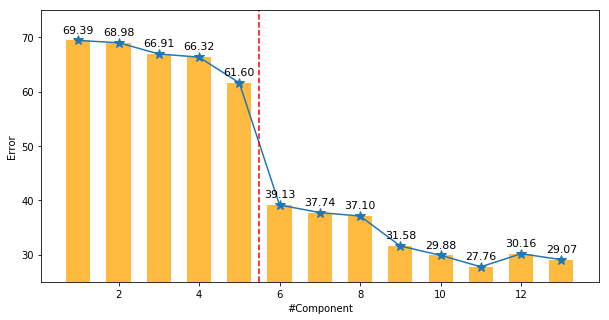

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,14),scores,marker='*',markersize=10)
plt.bar(range(1,14),scores,color='orange',width=0.6,alpha=0.75)
plt.plot([5.5,5.5],[25,75],color='red',linestyle='--')
for x,y in zip(range(1,14),scores):
    plt.text(x, y+1, '%.2f' % (y), ha='center', va= 'bottom',fontsize=11)
plt.ylim((25,75))
plt.xlabel('#Component')
plt.ylabel('Error')
plt.savefig('figure/errors.pdf')
plt.show()